In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np              # linear algebra
import pandas as pd             # data processing, I/O
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
import graphviz                 # decision tree visualization

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import tree

# to make matplotlib graphs appears after the code
%matplotlib inline

# set random seed
random.seed(123)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


Este dataset contiene estadísticas de los objetivos importantes que influyen en una partida de League of Leyends, como muertes, asistencias, torres destruidas, oro y otros factores. Se tiene estos datos para ambos contrincantes, "azul" y "rojo", así también como el resultado del juego, si gana rojo o gana azul.

Para este laboratorio se implementarán los algoritmos de Support Vector Machine y Decision Tree para predecir la variable respuesta, "azul gana", que es 1 si gana y 0 si pierde, osea que rojo gana.

Podemos observar que tenemos 9879 observaciones, con 40 caraterísticas, siendo estas todas numéricas.

In [139]:
dataset_path = "/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv"
dataset = pd.read_csv(dataset_path)

In [140]:
dataset.shape

(9879, 40)

In [141]:
dataset.info()
dataset.apply(["min","max","mean", "median"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.20000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.00000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.20000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.36198,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.90414
median,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.00000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.80000


Debido a que tenemos datos tanto para el equipo azul como para el rojo, vamos a tomar solamente las del equipo azul y ver una correlación entre estas variables y así descartar algunas para evitar multicolinealidad.

<Axes: >

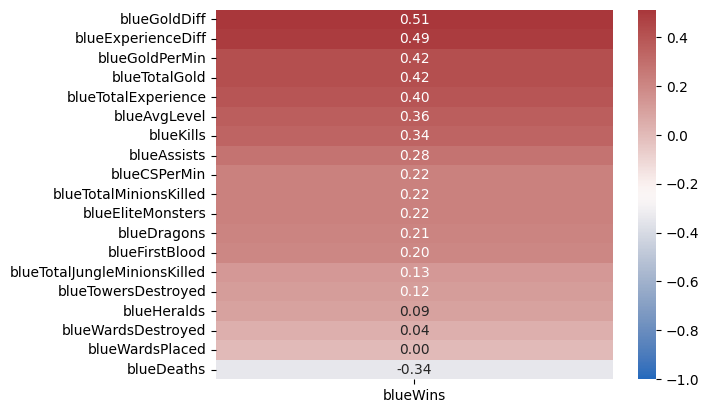

In [142]:
features = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']

X = dataset[features]
y = dataset['blueWins']

df = X.corrwith(dataset['blueWins']).to_frame().sort_values(by=0, ascending=False)
df.columns = ['blueWins']
sns.heatmap(df, cmap='vlag', annot=True, fmt='.2f', vmin=-1)

<Axes: >

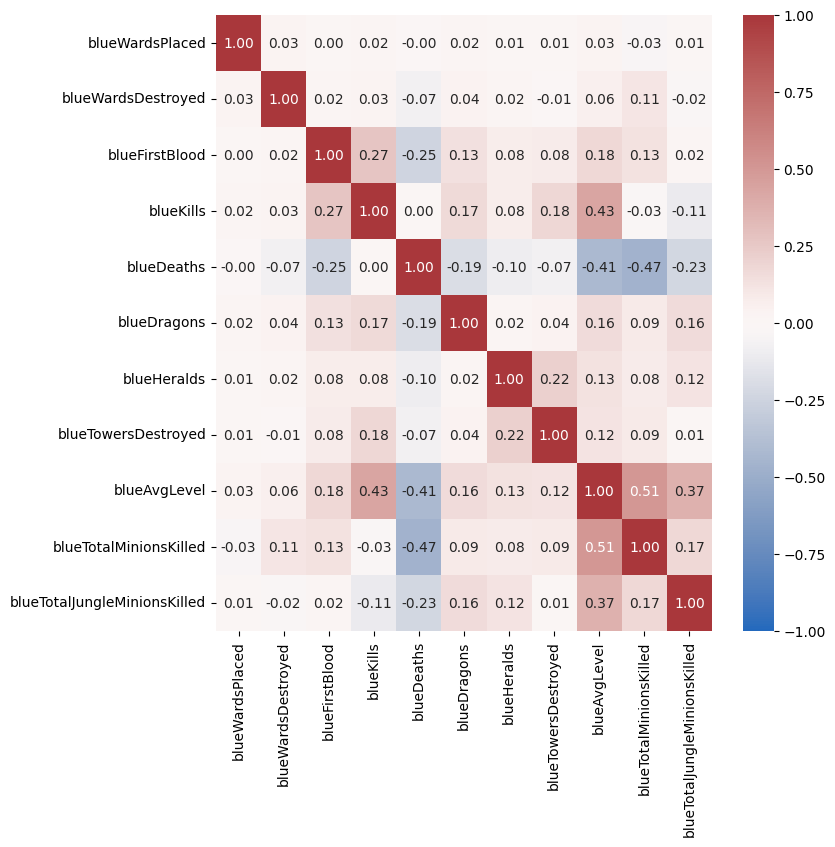

In [143]:
features = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled']


X = dataset[features]

plt.figure(figsize=(8, 8))
sns.heatmap(X.corr(), cmap='vlag', annot=True, fmt='.2f', vmin=-1)

Así tambien, como tenemos la información del equipo rojo, vamos a obtener la diferencia entre estas estadísticas para tener una mejor generalización de las variables.

In [144]:
def get_diff(blue, red):
    diff = blue-red
    return diff

for idx, attr in enumerate(features):
  features[idx] = attr + 'Diff'
  dataset[features[idx]] = dataset.apply(lambda row: get_diff(blue = row[attr], red = row['red' + attr[4:]]), axis = 1)

dataset.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueWardsDestroyedDiff,blueFirstBloodDiff,blueKillsDiff,blueDeathsDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff,blueAvgLevelDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff
0,4519157822,0,28,2,1,9,6,11,0,0,...,-4.0,1.0,3.0,-3.0,0.0,0.0,0.0,-0.2,-2.0,-19.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.2,-66.0,-9.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,-3.0,-1.0,-4.0,4.0,1.0,0.0,0.0,-0.4,-17.0,18.0
3,4524384067,0,43,1,0,4,5,5,1,0,...,-1.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,-34.0,8.0
4,4436033771,0,75,4,0,6,6,6,0,0,...,2.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-15.0,-10.0
5,4475365709,1,18,0,0,5,3,6,1,1,...,-5.0,-1.0,2.0,-2.0,1.0,0.0,0.0,0.0,4.0,-17.0
6,4493010632,1,18,3,1,7,6,7,1,1,...,2.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.4,61.0,18.0
7,4496759358,0,16,2,0,5,13,3,0,0,...,2.0,-1.0,-8.0,8.0,-1.0,0.0,0.0,-0.2,52.0,-6.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-51.0,8.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,-27.0,-4.0


Separamos el dataset para entrenamiento y prueba, así como la variable de resultado. Luego procedemos a la implementación del algoritmo de Decision Tree y las predicciones.

In [145]:
X = dataset[features]
y = dataset['blueWins']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (7903, 11)
Test shape: (1976, 11)


In [146]:
# Partición del dataset basado en el atributo y su valor
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calcular impureza de Gini para particionar
def gini_index(groups, classes):
	n_instances = float(sum([len(group) for group in groups]))
	gini = 0.0
	for group in groups:
		size = float(len(group))
		if size == 0:
			continue
		score = 0.0
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Obtener la partición del dataset por clase
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Crear valor para el nodo hoja
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Crear nodo hoja y sus particiones
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check si no hay partición
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check máxima profundidad
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# nodo izquierdo
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# nodo derecho
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

# Función decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Print decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

  # Predicción decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

# Clasificación decision tree
def decision_tree(train, test, max_depth, min_size):
 tree = build_tree(train, max_depth, min_size)
 predictions = list()
 for row in test:
  prediction = predict(tree, row)
  predictions.append(prediction)
 return(predictions)


In [147]:
# Usar dataset train y test para predicciones
Xi = X_train
Xi.loc[:, "blueWins"] = y_train
Xf = X_test

preds = decision_tree(np.array(Xi), np.array(Xf), 5, 1)

Luego de hacer la predicción, se hace la métrica de rendimiento con la especificidad y la sesitividad, en donde obtenemos 68% para sensitividad y 73% para especificidad. Esto nos dice que si quisieramos apostar en quien gana la partida, tenemos mayor probabilidad de acertar al decir que rojo gana, osea verdaderos negativos que sean negativos. De igual manera, la sesitividad no tiene una diferencia mayor a 5%.

In [148]:
# métrica de rendimiento
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity)
print(specificity)

0.6819541375872383
0.7379239465570401


Ahora con el algoritmo de Decision Tree de la librería sklearn, este nos da una menor diferencia entre especificidad y sensitividad, pero los resultados son muy similares a la implementación anterior del decision tree. Siendo la diferencia más significativa entre estos dos, es el tiempo que demora en crear el modelo, siendo sklearn mucho más rápido.

In [152]:
# con librerías usamos DecisionTreeClassifier con criterio gini

X = dataset[features]
y = dataset['blueWins']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit del modelo
clf_gini.fit(X_train, y_train)

# predecir
preds = clf_gini.predict(X_test)

# metrica
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity)
print(specificity)

0.6973684210526315
0.7257085020242915


[Text(0.4774590163934426, 0.9166666666666666, 'x[3] <= -0.5\ngini = 0.5\nsamples = 7903\nvalue = [3946, 3957]'),
 Text(0.21721311475409835, 0.75, 'x[3] <= -3.5\ngini = 0.399\nsamples = 3578\nvalue = [2594, 984]'),
 Text(0.09016393442622951, 0.5833333333333334, 'x[8] <= -0.3\ngini = 0.254\nsamples = 1562\nvalue = [1329, 233]'),
 Text(0.03278688524590164, 0.4166666666666667, 'x[1] <= -17.5\ngini = 0.199\nsamples = 1154\nvalue = [1025, 129]'),
 Text(0.01639344262295082, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.04918032786885246, 0.25, 'x[4] <= 5.5\ngini = 0.195\nsamples = 1151\nvalue = [1025, 126]'),
 Text(0.03278688524590164, 0.08333333333333333, 'gini = 0.257\nsamples = 534\nvalue = [453, 81]'),
 Text(0.06557377049180328, 0.08333333333333333, 'gini = 0.135\nsamples = 617\nvalue = [572, 45]'),
 Text(0.14754098360655737, 0.4166666666666667, 'x[9] <= 35.5\ngini = 0.38\nsamples = 408\nvalue = [304, 104]'),
 Text(0.11475409836065574, 0.25, 'x[1] <= 1.5\ngini = 0.358\nsamples

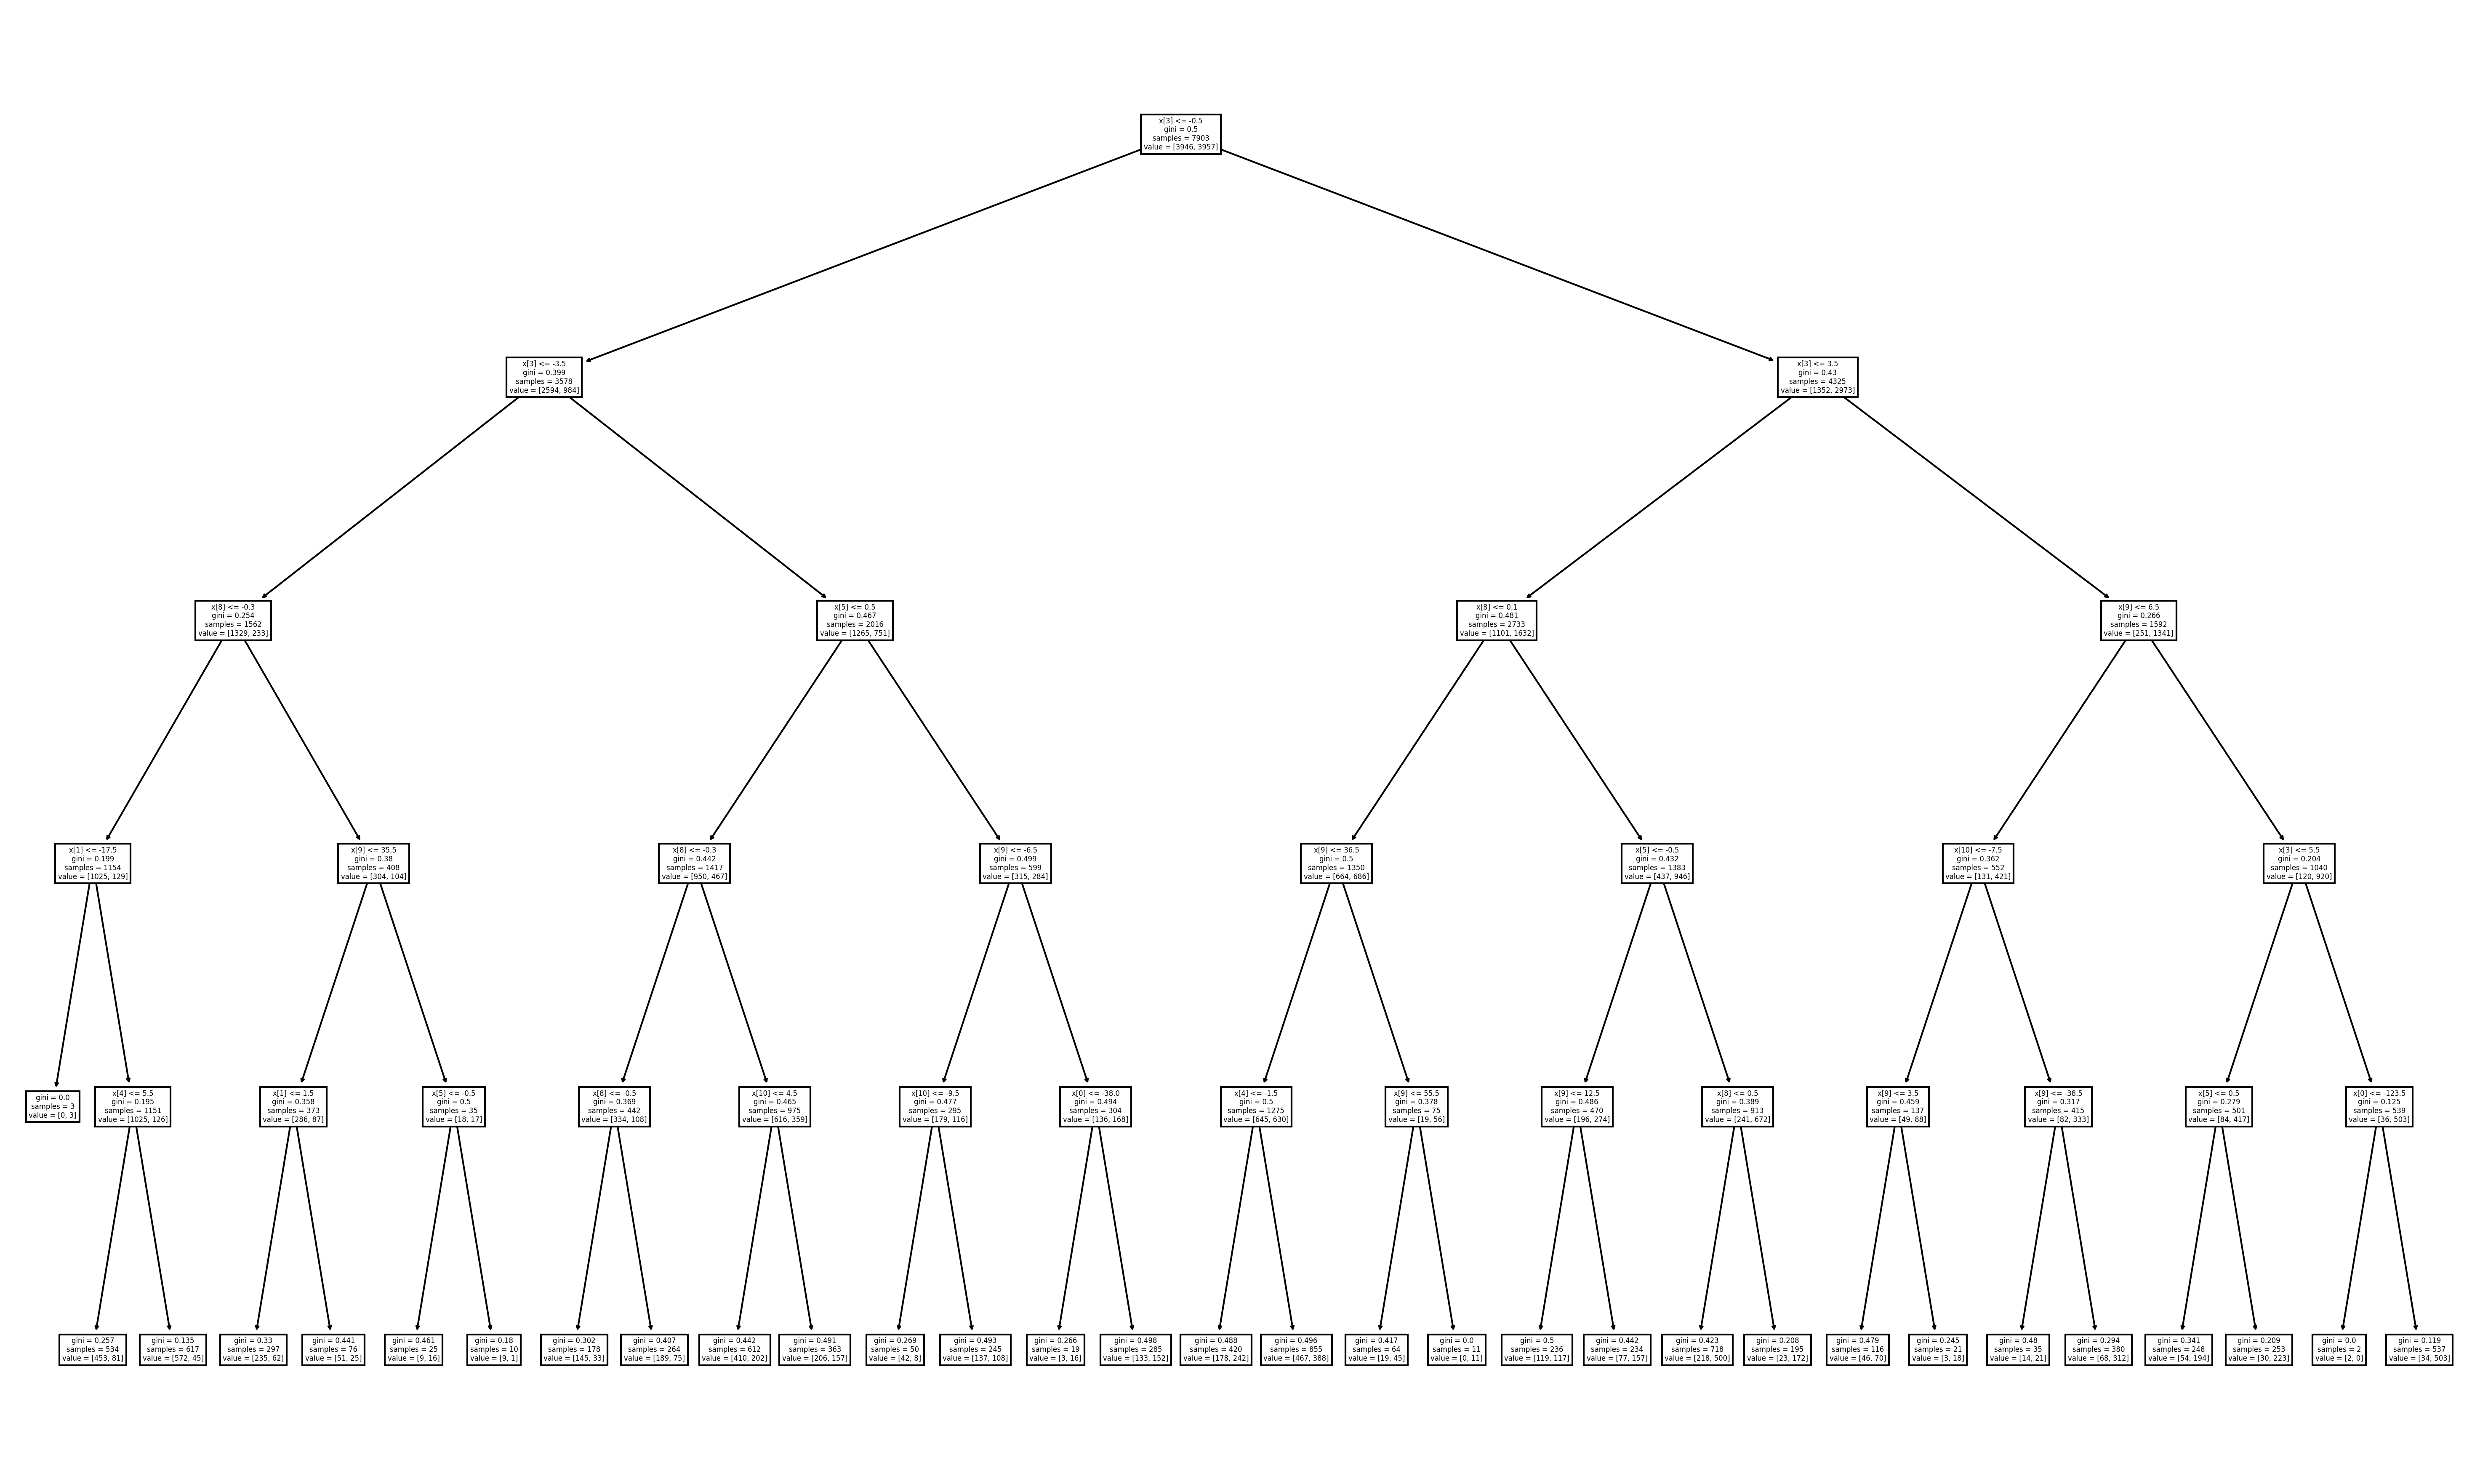

In [151]:
# plot del decision tree
#plt.figure(figsize=(25,15), dpi= 300)
#tree.plot_tree(clf_gini.fit(X_train, y_train))

Referencias:

*   https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
*   https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
*   https://www.kaggle.com/code/pragdev/leaguewinpredictor/notebook

